In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [2]:
Forest=pd.read_csv("forestfires.csv")
Forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
Forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
#Removing dummies
Forest_WD= Forest.copy()
Forest_WD.drop(Forest_WD.columns[11:30],axis=1,inplace = True)
Forest_WD

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [5]:
Forest_WD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [6]:
Forest_WD.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [7]:
#Using label encoding as it is faster than dummy variables


label_encoder = LabelEncoder()
Forest_WD.month= label_encoder.fit_transform(Forest_WD.month) 
Forest_WD.day= label_encoder.fit_transform(Forest_WD.day) 
Forest_WD.size_category= label_encoder.fit_transform(Forest_WD.size_category) 
Forest_WD.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [8]:
#Defining X & Y
X=Forest_WD.iloc[:,:-1]
Y=Forest_WD.iloc[:,-1]

# Model Building

In [9]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=11, activation='relu'))          #20=neurons      20bios
model.add(Dense(10, activation='relu'))                        #10=neurons      10bios
model.add(Dense(1,  activation='sigmoid'))                     #1=neuron@output 1bios

In [10]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=20) #33% is not taken in training, epochs=passing training data no of times
#Vanilla GDA method   updates 514 time for 1 epochs,   variatin will be too less
#Stochastic GDA method updates 514 times for 1 epochs, variation will be too high
#minibatch gda method (mostly used)

Epoch 1/250
18/18 [==============================] - 3s 34ms/step - loss: 74.3850 - accuracy: 0.2428 - val_loss: 54.3370 - val_accuracy: 0.3216
Epoch 2/250
18/18 [==============================] - 0s 13ms/step - loss: 37.1958 - accuracy: 0.2399 - val_loss: 21.0647 - val_accuracy: 0.3216
Epoch 3/250
18/18 [==============================] - 0s 18ms/step - loss: 8.3299 - accuracy: 0.4509 - val_loss: 1.9569 - val_accuracy: 0.7661
Epoch 4/250
18/18 [==============================] - 0s 19ms/step - loss: 1.8493 - accuracy: 0.7919 - val_loss: 2.4518 - val_accuracy: 0.5556
Epoch 5/250
18/18 [==============================] - 0s 12ms/step - loss: 1.1906 - accuracy: 0.7601 - val_loss: 1.3639 - val_accuracy: 0.6784
Epoch 6/250
18/18 [==============================] - 0s 14ms/step - loss: 1.0319 - accuracy: 0.7890 - val_loss: 1.5588 - val_accuracy: 0.6199
Epoch 7/250
18/18 [==============================] - 0s 8ms/step - loss: 0.8680 - accuracy: 0.8324 - val_loss: 1.4137 - val_accuracy: 0.6491
Epo

18/18 [==============================] - 0s 8ms/step - loss: 0.0498 - accuracy: 0.9884 - val_loss: 0.1413 - val_accuracy: 0.9532
Epoch 59/250
18/18 [==============================] - 0s 8ms/step - loss: 0.0481 - accuracy: 0.9884 - val_loss: 0.1442 - val_accuracy: 0.9474
Epoch 60/250
18/18 [==============================] - 0s 8ms/step - loss: 0.0508 - accuracy: 0.9884 - val_loss: 0.1408 - val_accuracy: 0.9532
Epoch 61/250
18/18 [==============================] - 0s 8ms/step - loss: 0.0490 - accuracy: 0.9884 - val_loss: 0.1426 - val_accuracy: 0.9474
Epoch 62/250
18/18 [==============================] - 0s 16ms/step - loss: 0.0505 - accuracy: 0.9827 - val_loss: 0.1452 - val_accuracy: 0.9474
Epoch 63/250
18/18 [==============================] - 0s 12ms/step - loss: 0.0612 - accuracy: 0.9769 - val_loss: 0.1606 - val_accuracy: 0.9240
Epoch 64/250
18/18 [==============================] - 0s 14ms/step - loss: 0.0448 - accuracy: 0.9913 - val_loss: 0.1327 - val_accuracy: 0.9532
Epoch 65/250
18/

18/18 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.1170 - val_accuracy: 0.9532
Epoch 116/250
18/18 [==============================] - 0s 9ms/step - loss: 0.0286 - accuracy: 0.9884 - val_loss: 0.1063 - val_accuracy: 0.9532
Epoch 117/250
18/18 [==============================] - 0s 12ms/step - loss: 0.0234 - accuracy: 0.9942 - val_loss: 0.1043 - val_accuracy: 0.9591
Epoch 118/250
18/18 [==============================] - 0s 8ms/step - loss: 0.0225 - accuracy: 0.9971 - val_loss: 0.1089 - val_accuracy: 0.9474
Epoch 119/250
18/18 [==============================] - 0s 8ms/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.1067 - val_accuracy: 0.9474
Epoch 120/250
18/18 [==============================] - 0s 8ms/step - loss: 0.0222 - accuracy: 0.9971 - val_loss: 0.0958 - val_accuracy: 0.9649
Epoch 121/250
18/18 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.9884 - val_loss: 0.0973 - val_accuracy: 0.9591
Epoch 122/25

18/18 [==============================] - 0s 12ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0894 - val_accuracy: 0.9708
Epoch 173/250
18/18 [==============================] - 0s 9ms/step - loss: 0.0175 - accuracy: 0.9971 - val_loss: 0.0940 - val_accuracy: 0.9532
Epoch 174/250
18/18 [==============================] - 0s 11ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0845 - val_accuracy: 0.9708
Epoch 175/250
18/18 [==============================] - 0s 7ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9591
Epoch 176/250
18/18 [==============================] - 0s 10ms/step - loss: 0.0271 - accuracy: 0.9884 - val_loss: 0.0966 - val_accuracy: 0.9649
Epoch 177/250
18/18 [==============================] - 0s 13ms/step - loss: 0.0155 - accuracy: 0.9971 - val_loss: 0.1354 - val_accuracy: 0.9532
Epoch 178/250
18/18 [==============================] - 0s 13ms/step - loss: 0.0162 - accuracy: 0.9971 - val_loss: 0.0912 - val_accuracy: 0.9649
Epoch 17

18/18 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.0964 - val_accuracy: 0.9532
Epoch 230/250
18/18 [==============================] - 0s 8ms/step - loss: 0.0177 - accuracy: 0.9913 - val_loss: 0.0939 - val_accuracy: 0.9649
Epoch 231/250
18/18 [==============================] - 0s 12ms/step - loss: 0.0183 - accuracy: 0.9913 - val_loss: 0.0946 - val_accuracy: 0.9591
Epoch 232/250
18/18 [==============================] - 0s 9ms/step - loss: 0.0185 - accuracy: 0.9913 - val_loss: 0.0851 - val_accuracy: 0.9708
Epoch 233/250
18/18 [==============================] - 0s 11ms/step - loss: 0.0275 - accuracy: 0.9855 - val_loss: 0.2767 - val_accuracy: 0.9123
Epoch 234/250
18/18 [==============================] - 0s 11ms/step - loss: 0.0368 - accuracy: 0.9913 - val_loss: 0.1414 - val_accuracy: 0.9474
Epoch 235/250
18/18 [==============================] - 0s 12ms/step - loss: 0.0183 - accuracy: 0.9884 - val_loss: 0.1026 - val_accuracy: 0.9591
Epoch 236

In [13]:
# evaluate the model
scores = model.evaluate(X, Y)
print(model.metrics_names)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(scores)

17/17 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9865
['loss', 'accuracy']
accuracy: 98.65%
[0.03578520938754082, 0.9864603281021118]


# Visualize training history

In [14]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

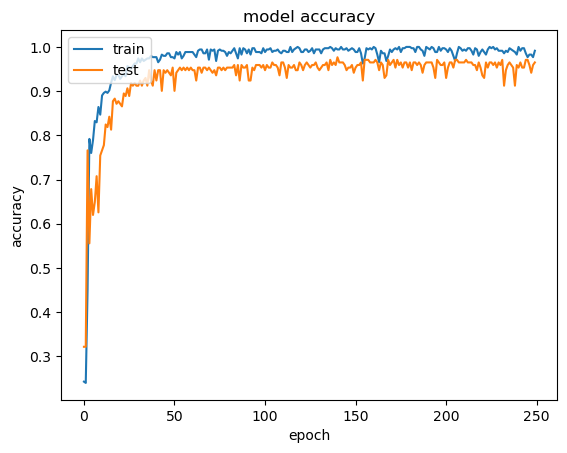

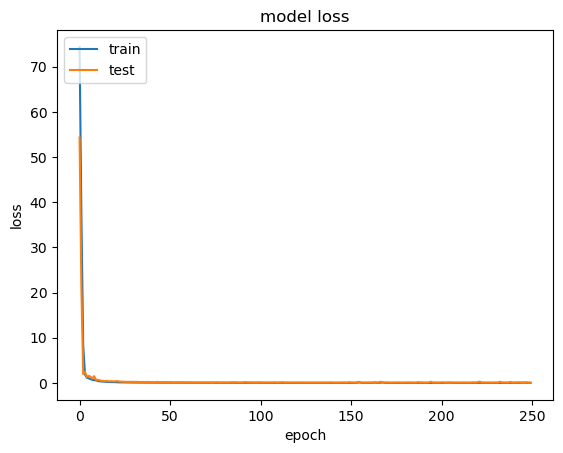

In [15]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Conclusion

In [16]:
#The Model has 98.06% Accuracy